In [35]:
import numpy as np
import random

In [36]:
def init_parameters(input_size, hidden_size, output_size):
    weights_1 = np.random.uniform(-1, 1, (input_size, hidden_size))/input_size
    weights_2 = np.random.uniform(-1, 1, (hidden_size, output_size))/hidden_size
    return weights_1, weights_2

def init_parameters(input_size, hidden_size, output_size):
    weights_1 = np.random.uniform(-0.1, 0.1, (input_size, hidden_size))/input_size
    weights_2 = np.random.uniform(-0.1, 0.1, (hidden_size, output_size))/hidden_size
    return weights_1, weights_2


def init_parameters(input_size, hidden_size, output_size):
    xavier_scale_1 = np.sqrt(2.0 / (input_size + hidden_size))
    xavier_scale_2 = np.sqrt(2.0 / (hidden_size + output_size))
    
    weights_1 = np.random.randn(input_size, hidden_size) * xavier_scale_1
    weights_2 = np.random.randn(hidden_size, output_size) * xavier_scale_2
    
    return weights_1, weights_2


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)



def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - (x ** 2)



def update_weights(weights, weight_changes, learning_rate):
    weights += learning_rate * weight_changes
    weight_changes = 0
    return weights , weight_changes

## Question 1

In [37]:

def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = sigmoid(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors * sigmoid_derivative(final_output)
    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * sigmoid_derivative(hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, np.mean(np.abs(output_errors))


### Train Function

In [38]:
def train(X_train, y_train, input_size, hidden_size, output_size,
          learning_rate=0.1, epochs=10000, print_every=1000):
    
    weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)
    n_samples = len(X_train)  
    error_list = []
    for epoch in range(epochs):
        error_sum = 0
        for I, T in zip(X_train, y_train):
        
            hidden_output, final_output = forward(I, weights_1, weights_2)
            
            
            weight_changes_1, weight_changes_2, error = backward(
                I, hidden_output, final_output, T, weights_2)
            error_sum += error
             
            #Update weights after every training sample
            weights_1, weight_changes_1 = update_weights(weights_1, weight_changes_1, learning_rate)
            weights_2, weight_changes_2 = update_weights(weights_2, weight_changes_2, learning_rate)
            
        avg_error = (error_sum / n_samples) 
        error_list.append(avg_error)

        
        if epoch % print_every == 0:
            print(f"Epoch {epoch}, Error: {avg_error:.4f}")
    
    return weights_1, weights_2, error_list, learning_rate,hidden_size

### XOR with 0.3 LR and 4 hidden layers

In [41]:
input_size = 2
hidden_size = 4
output_size = 1
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])

learning_rate = 0.3
epochs = 10000
error_list = []

def init_parameters(input_size, hidden_size, output_size):

    xavier_scale_1 = np.sqrt(2.0 / (input_size + hidden_size))
    xavier_scale_2 = np.sqrt(2.0 / (hidden_size + output_size))
    
    weights_1 = np.random.randn(input_size, hidden_size) * xavier_scale_1
    weights_2 = np.random.randn(hidden_size, output_size) * xavier_scale_2
    
    return weights_1, weights_2


weights_1, weights_2, error_list, learning_rate,hidden_size = train(inputs, targets, input_size,hidden_size,output_size,learning_rate,epochs,print_every=1 )


Epoch 0, Error: 0.5033
Epoch 1, Error: 0.5034
Epoch 2, Error: 0.5036
Epoch 3, Error: 0.5036
Epoch 4, Error: 0.5037
Epoch 5, Error: 0.5038
Epoch 6, Error: 0.5039
Epoch 7, Error: 0.5040
Epoch 8, Error: 0.5040
Epoch 9, Error: 0.5041
Epoch 10, Error: 0.5041
Epoch 11, Error: 0.5042
Epoch 12, Error: 0.5042
Epoch 13, Error: 0.5043
Epoch 14, Error: 0.5043
Epoch 15, Error: 0.5043
Epoch 16, Error: 0.5044
Epoch 17, Error: 0.5044
Epoch 18, Error: 0.5044
Epoch 19, Error: 0.5044
Epoch 20, Error: 0.5044
Epoch 21, Error: 0.5045
Epoch 22, Error: 0.5045
Epoch 23, Error: 0.5045
Epoch 24, Error: 0.5045
Epoch 25, Error: 0.5045
Epoch 26, Error: 0.5045
Epoch 27, Error: 0.5045
Epoch 28, Error: 0.5046
Epoch 29, Error: 0.5046
Epoch 30, Error: 0.5046
Epoch 31, Error: 0.5046
Epoch 32, Error: 0.5046
Epoch 33, Error: 0.5046
Epoch 34, Error: 0.5046
Epoch 35, Error: 0.5046
Epoch 36, Error: 0.5046
Epoch 37, Error: 0.5046
Epoch 38, Error: 0.5046
Epoch 39, Error: 0.5046
Epoch 40, Error: 0.5046
Epoch 41, Error: 0.5046
Ep

In [ ]:

with open('log_XOR.txt', 'w') as f:
    for error in error_list:
        f.write(f"{error}\n")

## Check predicted outputs

In [7]:
for I in inputs:
    hidden_output, final_output  = forward(I, weights_1, weights_2)
    print(f"Input: {I}, Predicted Output: {final_output}")

Input: [0 0], Predicted Output: [0.03991923]
Input: [0 1], Predicted Output: [0.96462858]
Input: [1 0], Predicted Output: [0.96648879]
Input: [1 1], Predicted Output: [0.02753148]


## Compare differnt models and store results

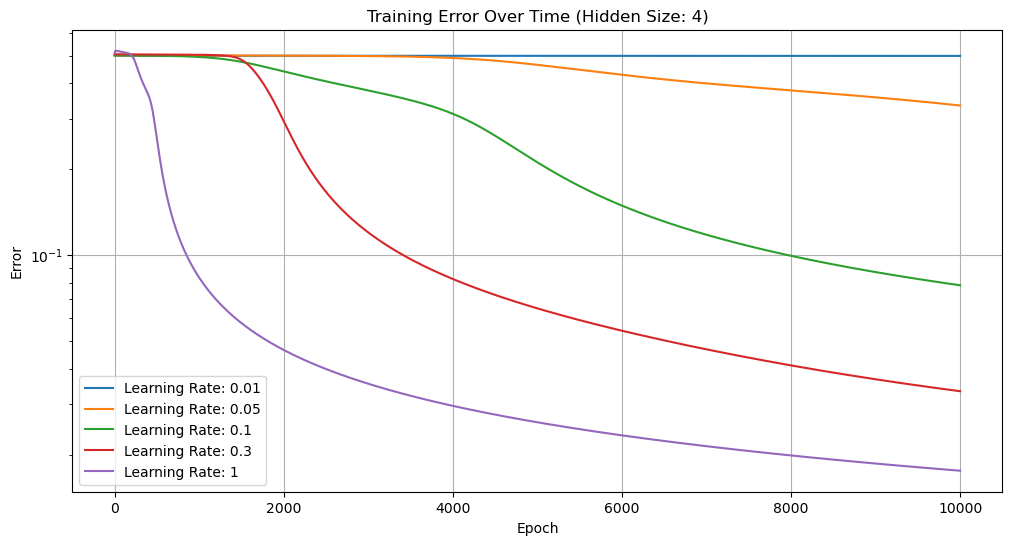

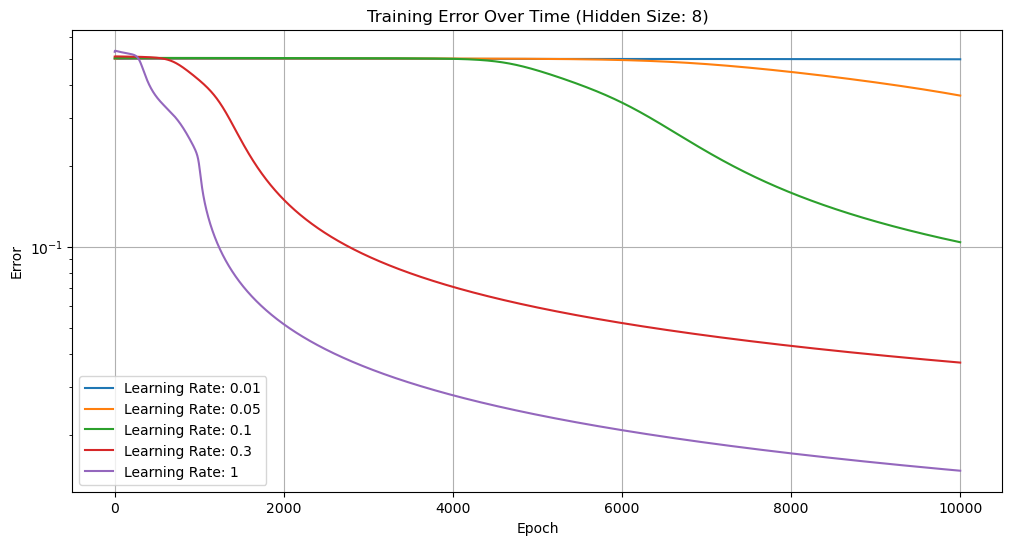

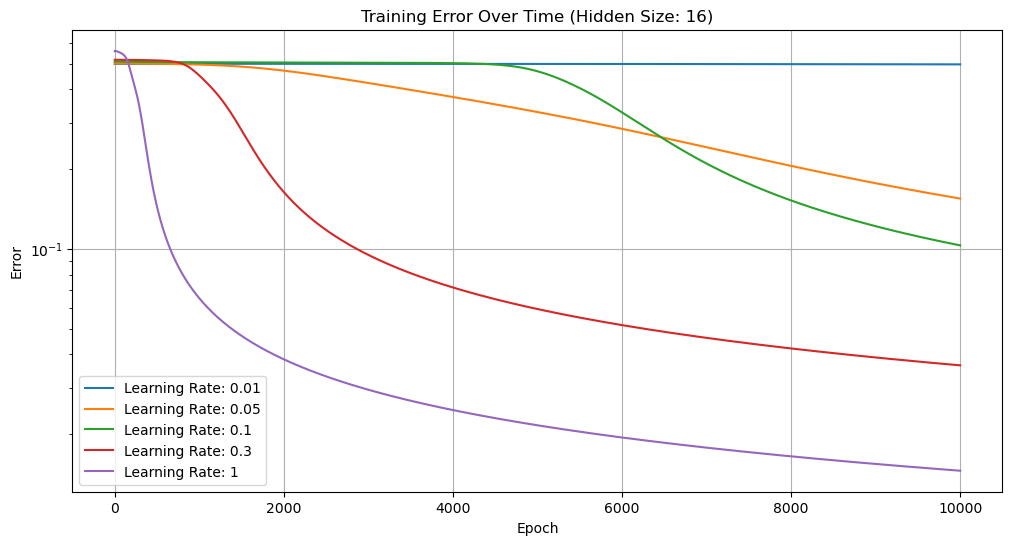


Error Analysis at Specific Epochs:


,Hidden Size,Learning Rate,Error@1000,Error@2000,Error@5000,Error@10000
0,4,0.010000,0.499079,0.499075,0.499066,0.498597
1,4,0.050000,0.500300,0.499793,0.463937,0.334100
2,4,0.100000,0.494406,0.439850,0.211260,0.078353
3,4,0.300000,0.503300,0.294315,0.065032,0.033336
4,4,1.000000,0.083309,0.046493,0.025943,0.017553
5,8,0.010000,0.499589,0.499501,0.499115,0.497530
6,8,0.050000,0.501480,0.501365,0.499385,0.364615
7,8,0.100000,0.503099,0.502827,0.452172,0.103911
8,8,0.300000,0.416010,0.149596,0.059427,0.037082
9,8,1.000000,0.200186,0.051505,0.023710,0.014694


In [ ]:
import matplotlib.pyplot as plt
import json
import pickle
from datetime import datetime
import pandas as pd

def compare_parameters(X_train, y_train, input_size, hidden_sizes, learning_rates, output_size,
                      epochs=10000, print_every=1000, save_path='nn_results.pkl'):
    """
    Compare different combinations of hidden sizes and learning rates and save results.
    
    Parameters:
    - save_path: Path to save the results dictionary
    """
    fig_size = (12, 6)
    results = {}
    
    results['metadata'] = {
        'timestamp': str(datetime.now()),
        'epochs': epochs,
        'input_size': input_size,
        'output_size': output_size,
        'hidden_sizes': hidden_sizes,
        'learning_rates': learning_rates
    }
    
    results['training_data'] = {}
    
    for hidden_size in hidden_sizes:
        plt.figure(figsize=fig_size)
        
        for lr in learning_rates:
            _, _, error_list, learning_rate, hidden_size = train(
                X_train, y_train, 
                input_size, 
                hidden_size, 
                output_size,
                learning_rate=lr,
                epochs=epochs,
                print_every=print_every
            )
            
            plt.plot(error_list, label=f'Learning Rate: {lr}')
            
            results['training_data'][f'hidden_{hidden_size}_lr_{lr}'] = list(error_list)
        
        plt.title(f'Training Error Over Time (Hidden Size: {hidden_size})')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.yscale('log')

        plt.legend()
        plt.grid(True)
        plt.show()
    
    with open(save_path, 'wb') as f:
        pickle.dump(results, f)
    
    print(f"Results saved to {save_path}")
    return results




def load_and_analyze_results(load_path='Q1_results.pkl',epochs_of_interest=[1000, 2000, 5000, 10000]):
    """
    Load results and create both table and plots showing error at specific epochs.
    """
    with open(load_path, 'rb') as f:
        results = pickle.load(f)
    
    hidden_sizes = results['metadata']['hidden_sizes']
    learning_rates = results['metadata']['learning_rates']
    
    data = []
    
    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            error_list = results['training_data'][f'hidden_{hidden_size}_lr_{lr}']
            row = {
                'Hidden Size': hidden_size,
                'Learning Rate': lr
            }
            for epoch in epochs_of_interest:
                epoch_idx = epoch - 1
                if epoch_idx < len(error_list):
                    row[f'Error@{epoch}'] = error_list[epoch_idx]
            data.append(row)
    
    df = pd.DataFrame(data)
    
    for hidden_size in hidden_sizes:
        plt.figure(figsize=(12, 6))
        df_filtered = df[df['Hidden Size'] == hidden_size]
        
        for lr in learning_rates:
            error_list = results['training_data'][f'hidden_{hidden_size}_lr_{lr}']
            plt.plot(error_list, label=f'Learning Rate: {lr}')
        
        plt.title(f'Training Error Over Time (Hidden Size: {hidden_size})')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.legend()
        plt.grid(True)
        plt.yscale('log')
        plt.show()
    
    pd.set_option('display.float_format', lambda x: '%.6f' % x)
    print("\nError Analysis at Specific Epochs:")
    return df.sort_values(['Hidden Size', 'Learning Rate'])



In [ ]:
hidden_sizes = [4, 8, 16]
learning_rates = [0.01,0.05, 0.1, 0.3,1]
6
"""results = compare_parameters(
    inputs, 
    targets,
    input_size=2,
    hidden_sizes=hidden_sizes,
    learning_rates=learning_rates,
    output_size=1,
    save_path='Q1_results.pkl'
)"""





df = load_and_analyze_results('Q1_results.pkl')
df

## Question 2

In [43]:
import numpy as np


input_vectors = np.random.uniform(-1, 1, (500, 4))

# Calculate target outputs using sin(x1-x2+x3-x4)
targets = np.sin(input_vectors[:, 0] - input_vectors[:, 1] + 
                input_vectors[:, 2] - input_vectors[:, 3])#

train_size = 400
test_size = 100

X_train = input_vectors[:train_size]
y_train = targets[:train_size]
X_test = input_vectors[train_size:train_size+test_size]
y_test = targets[train_size:train_size+test_size]
X_train[0],y_train[0]


(array([ 0.60239484, -0.77601698,  0.92212101, -0.12676859]),
 np.float64(0.6550820629910055))

In [44]:

def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = tanh(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = tanh(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors * tanh_derivative(final_output)
    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * tanh_derivative(hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, np.mean(np.abs(output_errors))

## SINE hidden size 20 LR 0.01

In [45]:
input_size = 4
hidden_size = 20
output_size = 1
learning_rate = 0.01
epochs = 10000



weights_1, weights_2, error_list, learning_rate,hidden_size = train(X_train, y_train, input_size,hidden_size,output_size,learning_rate,epochs,print_every=1 )



Epoch 0, Error: 0.2234
Epoch 1, Error: 0.0916
Epoch 2, Error: 0.0700
Epoch 3, Error: 0.0653
Epoch 4, Error: 0.0641
Epoch 5, Error: 0.0637
Epoch 6, Error: 0.0636
Epoch 7, Error: 0.0636
Epoch 8, Error: 0.0635
Epoch 9, Error: 0.0635
Epoch 10, Error: 0.0635
Epoch 11, Error: 0.0634
Epoch 12, Error: 0.0634
Epoch 13, Error: 0.0633
Epoch 14, Error: 0.0633
Epoch 15, Error: 0.0632
Epoch 16, Error: 0.0632
Epoch 17, Error: 0.0631
Epoch 18, Error: 0.0631
Epoch 19, Error: 0.0630
Epoch 20, Error: 0.0630
Epoch 21, Error: 0.0629
Epoch 22, Error: 0.0629
Epoch 23, Error: 0.0628
Epoch 24, Error: 0.0628
Epoch 25, Error: 0.0628
Epoch 26, Error: 0.0627
Epoch 27, Error: 0.0627
Epoch 28, Error: 0.0626
Epoch 29, Error: 0.0626
Epoch 30, Error: 0.0626
Epoch 31, Error: 0.0625
Epoch 32, Error: 0.0625
Epoch 33, Error: 0.0624
Epoch 34, Error: 0.0624
Epoch 35, Error: 0.0624
Epoch 36, Error: 0.0623
Epoch 37, Error: 0.0623
Epoch 38, Error: 0.0623
Epoch 39, Error: 0.0622
Epoch 40, Error: 0.0622
Epoch 41, Error: 0.0622
Ep

In [46]:

with open('log_SIN.txt', 'w') as f:
    for error in error_list:
        f.write(f"{error}\n")

In [23]:
def calculate_accuracies(X_test, y_test, weights_1, weights_2):
    _, predictions = forward(X_test, weights_1, weights_2)
    
    differences = np.abs(predictions - y_test)
    
    accuracy_0_1 = np.mean(differences <= 0.1)
    accuracy_0_001 = np.mean(differences <= 0.001)
    accuracy_0_0001 = np.mean(differences <= 0.0001)
    
    print(f"Accuracy (within 0.1): {accuracy_0_1:.2%}")
    print(f"Accuracy (within 0.001): {accuracy_0_001:.2%}")
    print(f"Accuracy (within 0.0001): {accuracy_0_0001:.2%}")
    
    return accuracy_0_1, accuracy_0_001, accuracy_0_0001

acc_0_1, acc_0_001, acc_0_0001 = calculate_accuracies(X_test, y_test, weights_1, weights_2)

Accuracy (within 0.1): 12.10%
Accuracy (within 0.001): 0.10%
Accuracy (within 0.0001): 0.02%


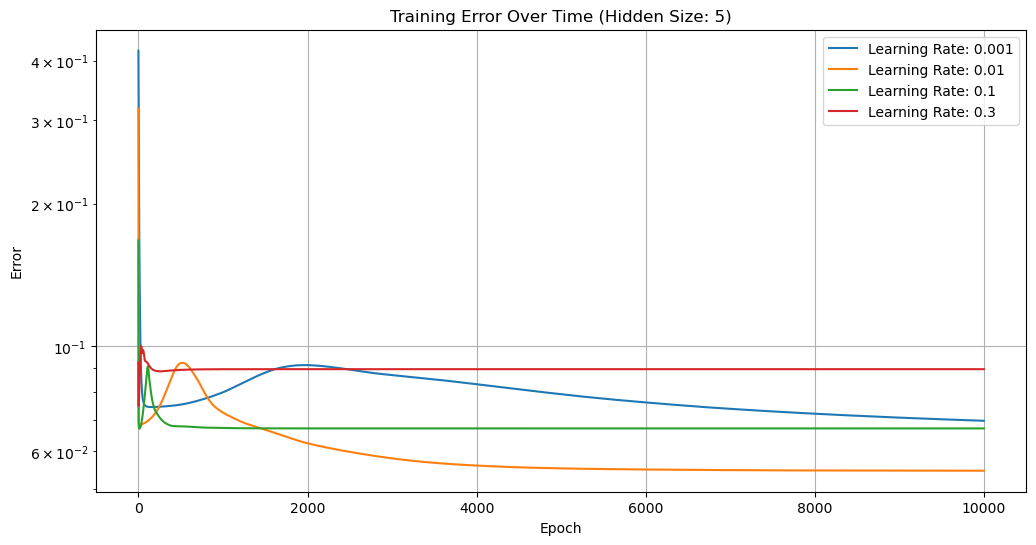

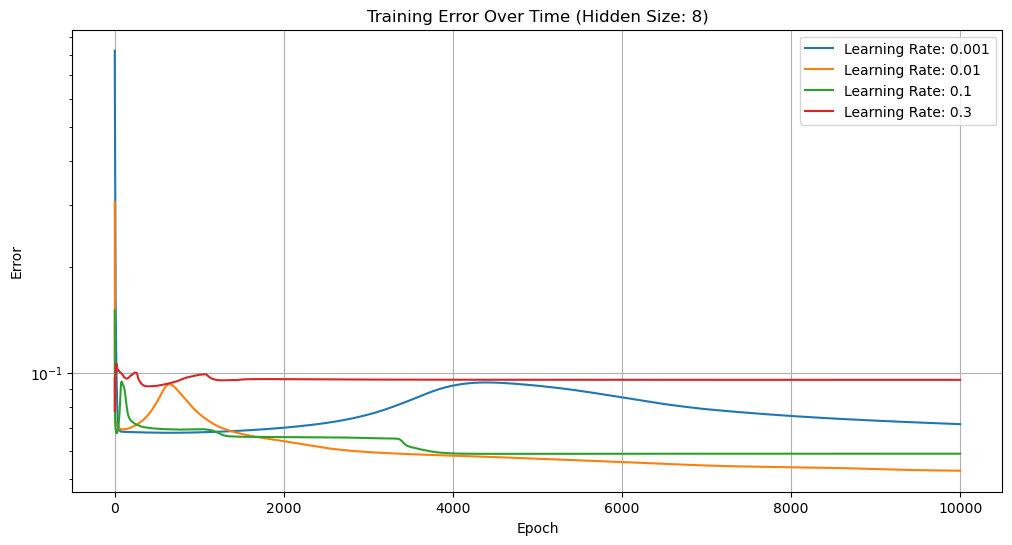

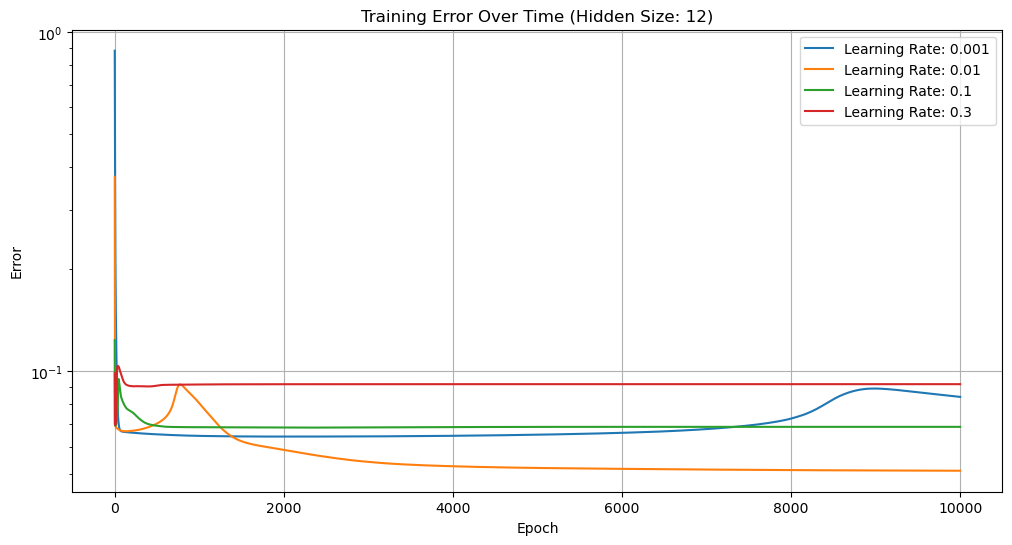

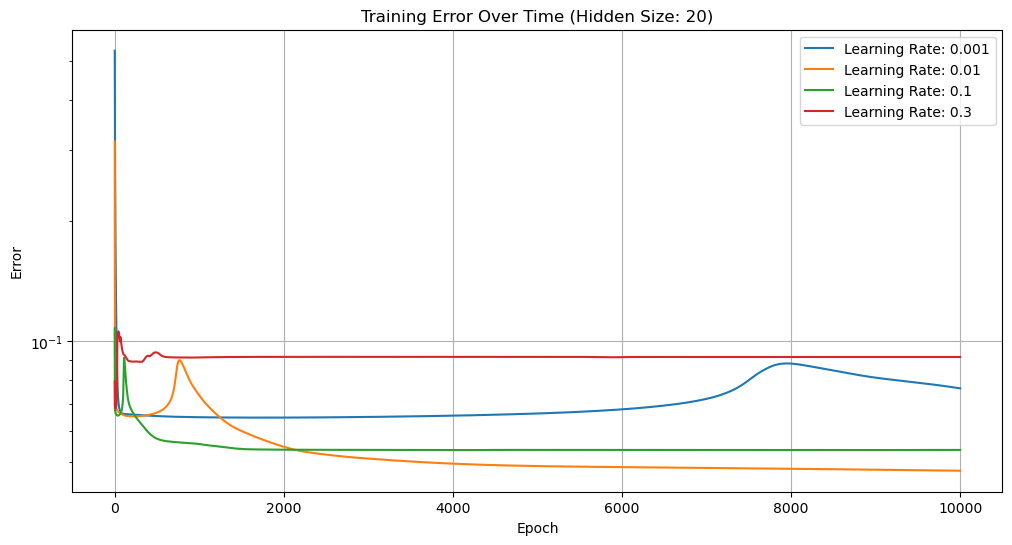

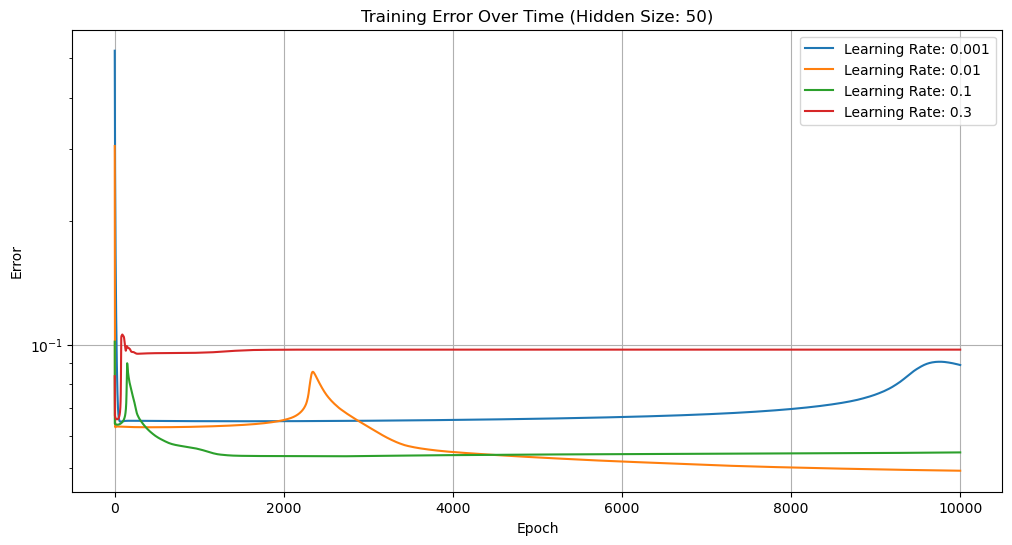


Error Analysis at Specific Epochs:


,Hidden Size,Learning Rate,Error@1000,Error@2000,Error@5000,Error@10000
0,5,0.001000,0.079979,0.091271,0.079244,0.069648
1,5,0.010000,0.072487,0.062437,0.055265,0.054641
2,5,0.100000,0.067249,0.067119,0.067116,0.067116
3,5,0.300000,0.089481,0.089500,0.089500,0.089500
4,8,0.001000,0.067867,0.069953,0.092047,0.071598
5,8,0.010000,0.076634,0.064051,0.057100,0.052811
6,8,0.100000,0.069299,0.065807,0.058982,0.059024
7,8,0.300000,0.098856,0.096082,0.095682,0.095655
8,12,0.001000,0.064558,0.064257,0.065082,0.084117
9,12,0.010000,0.080618,0.058715,0.051930,0.050963


In [ ]:
hidden_sizes = [5, 8, 12,20,50]
learning_rates = [0.001, 0.01, 0.1, 0.3]



"""results = compare_parameters(
    X_train, 
    y_train,
    input_size=4, 
    hidden_sizes=hidden_sizes,
    learning_rates=learning_rates,
    output_size=26,epochs=1000,
    save_path='Q2_results.pkl' 
)
"""
df = load_and_analyze_results('Q2_results.pkl')
df

## Question 3

In [48]:
def ReLU(x):
    return np.maximum(x, 0)



def ReLU_deriv(x):
    return (x > 0).astype(float) 



def softmax(x):
   exp_x = np.exp(x - np.max(x))
   return exp_x / exp_x.sum()

def softmax_derivative(x):
   s = softmax(x)
   return s * (1 - s)


def cross_entropy_loss(y_true, y_pred):
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # Handle both binary and multi-class cases
    if y_pred.ndim == 1:  # Binary classification
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    else:  # Multi-class classification
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))


def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = ReLU(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = softmax(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors 
    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * ReLU_deriv(hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, cross_entropy_loss(targets, final_output)



def init_parameters(input_size, hidden_size, output_size):
    #He initialization for hidden layer (with ReLU)
    he_scale_1 = np.sqrt(2.0 / input_size)
    #Xavier for output layer (with softmax)
    xavier_scale_2 = np.sqrt(2.0 / (hidden_size + output_size))
    
    weights_1 = np.random.randn(input_size, hidden_size) * he_scale_1
    weights_2 = np.random.randn(hidden_size, output_size) * xavier_scale_2
    
    return weights_1, weights_2


In [49]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = pd.read_csv("letter-recognition.data", header=None)
targets_raw = df[0].values.reshape(-1, 1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(targets_raw).toarray()

inputs = df.iloc[:, 1:].values



"""# Create scaler
scaler = MinMaxScaler()

# Fit and transform your training data
inputs = scaler.fit_transform(inputs)
"""

total_samples = len(inputs)
train_size = int(0.8 * total_samples)  # 80% for training
test_size = total_samples - train_size  # remaining 20% for testing

X_train = inputs[:train_size]
y_train = targets[:train_size]
X_test = inputs[train_size:]
y_test = targets[train_size:]

### Letter recognition 100 Hidden layers 0.001 LR

In [50]:
input_size = 16
hidden_size = 100
output_size = 26
learning_rate = 0.001
epochs = 1000






weights_1, weights_2, error_list, learning_rate,hidden_size = train(X_train, y_train, input_size,hidden_size,output_size,learning_rate,epochs,print_every=1 )


Epoch 0, Error: 0.0803
Epoch 1, Error: 0.0529
Epoch 2, Error: 0.0460
Epoch 3, Error: 0.0415
Epoch 4, Error: 0.0381
Epoch 5, Error: 0.0354
Epoch 6, Error: 0.0331
Epoch 7, Error: 0.0311
Epoch 8, Error: 0.0294
Epoch 9, Error: 0.0280
Epoch 10, Error: 0.0267
Epoch 11, Error: 0.0256
Epoch 12, Error: 0.0246
Epoch 13, Error: 0.0237
Epoch 14, Error: 0.0230
Epoch 15, Error: 0.0223
Epoch 16, Error: 0.0217
Epoch 17, Error: 0.0211
Epoch 18, Error: 0.0206
Epoch 19, Error: 0.0201
Epoch 20, Error: 0.0196
Epoch 21, Error: 0.0192
Epoch 22, Error: 0.0188
Epoch 23, Error: 0.0184
Epoch 24, Error: 0.0181
Epoch 25, Error: 0.0177
Epoch 26, Error: 0.0174
Epoch 27, Error: 0.0171
Epoch 28, Error: 0.0168
Epoch 29, Error: 0.0164
Epoch 30, Error: 0.0162
Epoch 31, Error: 0.0159
Epoch 32, Error: 0.0157
Epoch 33, Error: 0.0154
Epoch 34, Error: 0.0152
Epoch 35, Error: 0.0150
Epoch 36, Error: 0.0148
Epoch 37, Error: 0.0146
Epoch 38, Error: 0.0144
Epoch 39, Error: 0.0142
Epoch 40, Error: 0.0141
Epoch 41, Error: 0.0139
Ep

In [51]:

with open('log_LETTER.txt', 'w') as f:
    for error in error_list:
        f.write(f"{error}\n")

In [ ]:
predictions = []
actual = []


original_classes = encoder.categories_[0]  

for I, true_label in zip(X_test, y_test):
    hidden_output, final_output = forward(I, weights_1, weights_2)
    
    predicted_class_index = np.argmax(final_output)
    true_class_index = np.argmax(true_label)
    
    predicted_letter = original_classes[predicted_class_index]
    true_letter = original_classes[true_class_index]
    
    print(f"Predicted: {predicted_letter}, Actual: {true_letter}")

#calculate accuracy
correct = 0
total = len(X_test)

for I, true_label in zip(X_test, y_test):
    hidden_output, final_output = forward(I, weights_1, weights_2)
    if np.argmax(final_output) == np.argmax(true_label):
        correct += 1

accuracy = (correct / total) * 100
print(f"\nAccuracy: {accuracy:.2f}%")



Predicted: U, Actual: U
Predicted: N, Actual: N
Predicted: V, Actual: V
Predicted: I, Actual: I
Predicted: N, Actual: N
Predicted: H, Actual: H
Predicted: E, Actual: E
Predicted: Y, Actual: Y
Predicted: G, Actual: G
Predicted: E, Actual: E
Predicted: N, Actual: N
Predicted: B, Actual: B
Predicted: G, Actual: G
Predicted: L, Actual: L
Predicted: G, Actual: E
Predicted: W, Actual: G
Predicted: M, Actual: M
Predicted: D, Actual: D
Predicted: Y, Actual: Y
Predicted: R, Actual: R
Predicted: P, Actual: P
Predicted: D, Actual: D
Predicted: E, Actual: E
Predicted: W, Actual: W
Predicted: D, Actual: D
Predicted: Q, Actual: Q
Predicted: R, Actual: R
Predicted: G, Actual: G
Predicted: Y, Actual: Y
Predicted: R, Actual: R
Predicted: D, Actual: D
Predicted: J, Actual: J
Predicted: C, Actual: C
Predicted: I, Actual: I
Predicted: T, Actual: T
Predicted: C, Actual: C
Predicted: N, Actual: N
Predicted: M, Actual: M
Predicted: B, Actual: B
Predicted: H, Actual: H
Predicted: R, Actual: R
Predicted: Q, Ac

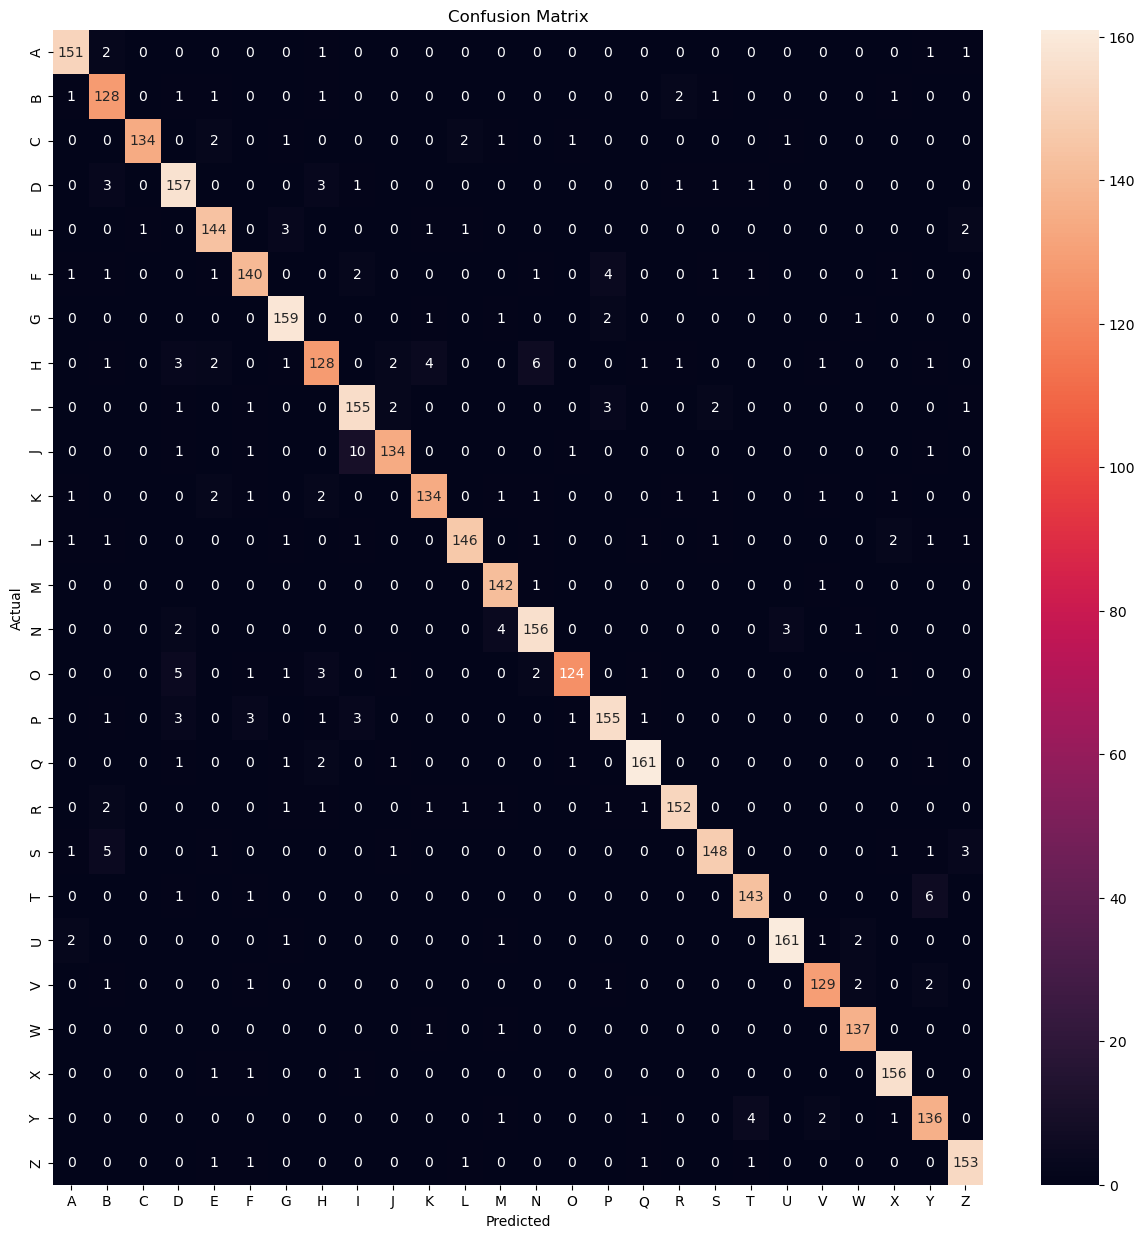

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = []
y_true = []

for I, true_label in zip(X_test, y_test):
    hidden_output, final_output = forward(I, weights_1, weights_2)
    pred_index = np.argmax(final_output)
    true_index = np.argmax(true_label)
    y_pred.append(original_classes[pred_index])
    y_true.append(original_classes[true_index])

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=original_classes,
            yticklabels=original_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
hidden_sizes = [10, 30, 50,100]
learning_rates = [0.0001, 0.001,0.01, 0.1]



"""results = compare_parameters(
    X_train, 
    y_train,
    input_size=16, 
    hidden_sizes=hidden_sizes,
    learning_rates=learning_rates,
    output_size=26,epochs=1000,
    save_path='Q3_results.pkl' 
)"""

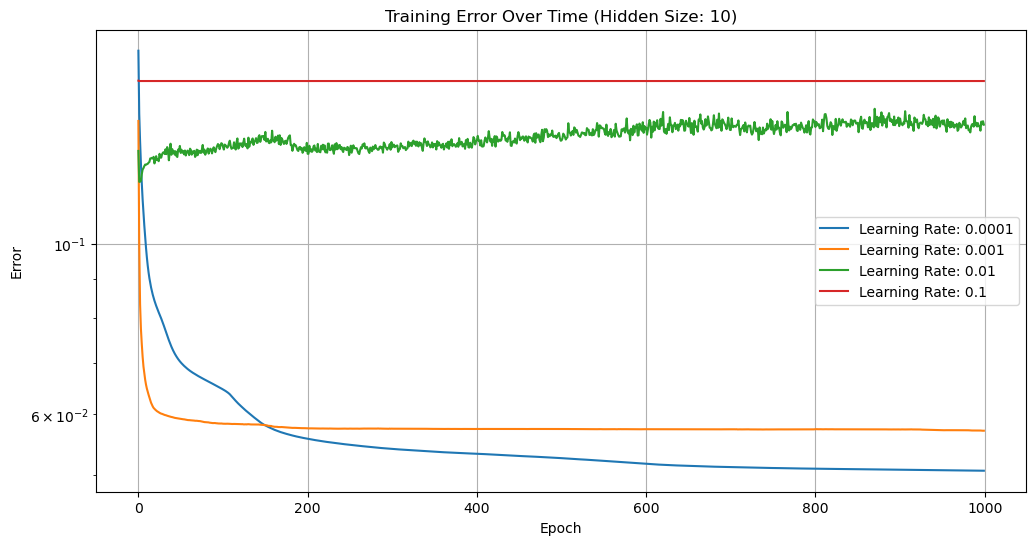

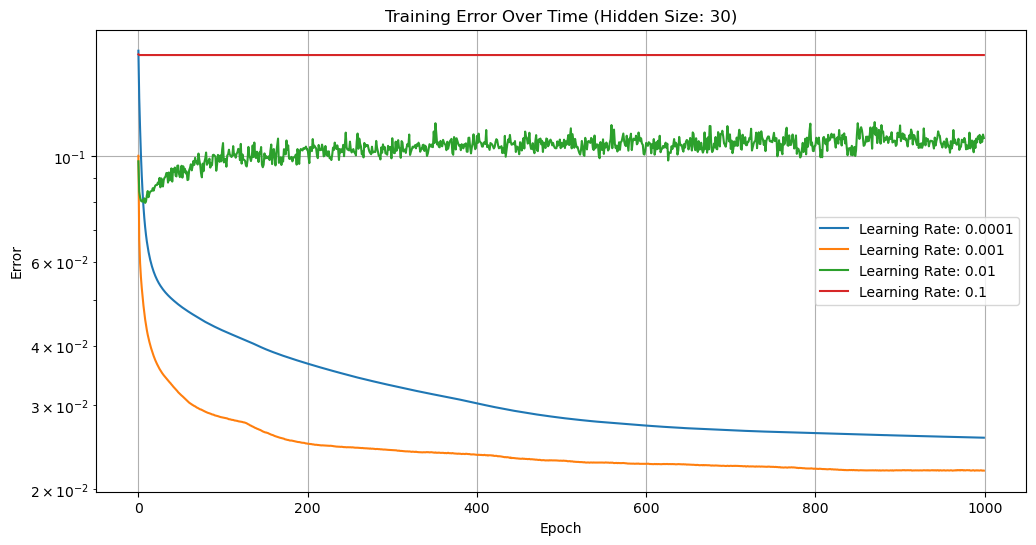

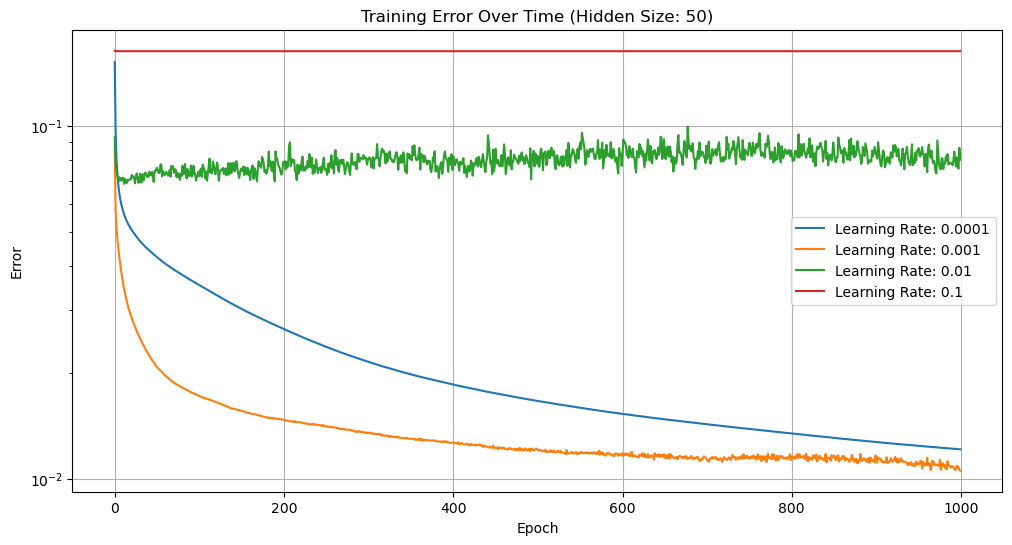

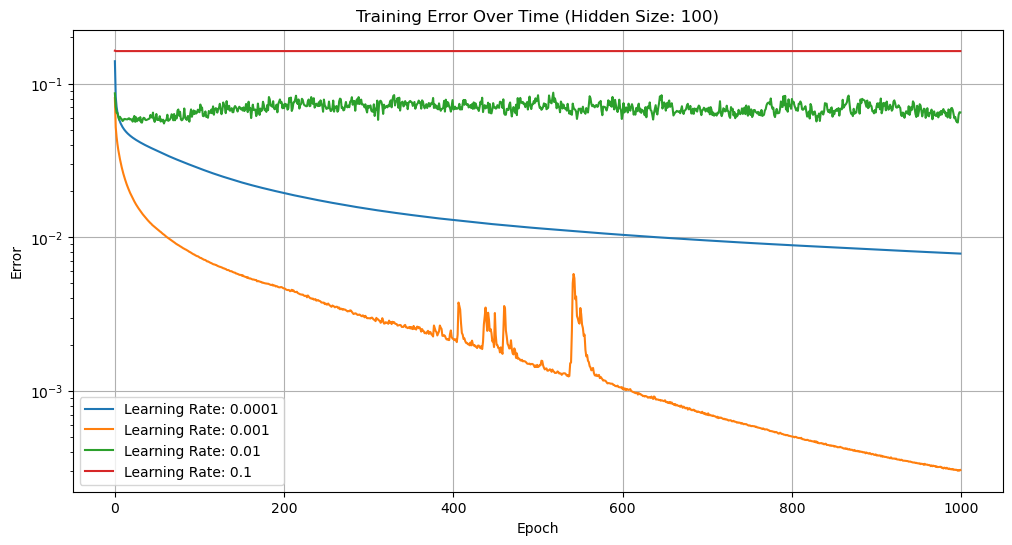


Error Analysis at Specific Epochs:


,Hidden Size,Learning Rate,Error@100,Error@200,Error@500,Error@1000
0,10,0.000100,0.064744,0.055789,0.052621,0.050666
1,10,0.001000,0.058355,0.057548,0.057413,0.057126
2,10,0.010000,0.135031,0.135430,0.136310,0.143029
3,10,0.100000,0.163024,0.163024,0.163024,0.163024
4,30,0.000100,0.043110,0.036737,0.028251,0.025653
5,30,0.001000,0.028285,0.024949,0.022963,0.021880
6,30,0.010000,0.103355,0.103261,0.103933,0.109155
7,30,0.100000,0.163024,0.163024,0.163024,0.163024
8,50,0.000100,0.035495,0.026626,0.016620,0.012114
9,50,0.001000,0.017197,0.014694,0.012133,0.010533


In [18]:


df = load_and_analyze_results('Q3_results.pkl',epochs_of_interest=[100,200,500,1000])
df